# Data Overview

This data was obtained from Kaggle from this link (https://www.kaggle.com/datasets/taweilo/mba-admission-dataset). This synthetic dataset is centred around making a decision tree model which will be able to predict whether a student will be either accepted or rejected from a fictional college based off of different factors from the dataset.

In [42]:
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('Acceptance.csv')

This is just to import the necessary libraries that I'm going to need for my model and using pandas to import and read the CSV containing my dataset.

In [43]:
filtered_data = df.drop(columns=['application_id', 'gender', 'international', 'race', 'work_industry']) # Here I am dropping the columns that are not needed for the decision tree
filtered_data.loc[filtered_data['admission'].isnull() | (filtered_data['admission'] == ''), 'admission'] = 'Rejected' # This line was obtained from ChatGPT and it's used to replace the empty and null values with 'Rejected' in the admission column
filtered_data.to_csv('filtered_data.csv')
X = filtered_data[['gpa', 'gmat']]
Y = filtered_data['admission']


In this code block I am filtering my data to remove the values that aren't necessary for the model and extracting it into it's own csv

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=258)

This is just to seperate my test data from my training data so that my model can be trained and tested appropriately, I am splitting it 80% training and 20% testing data

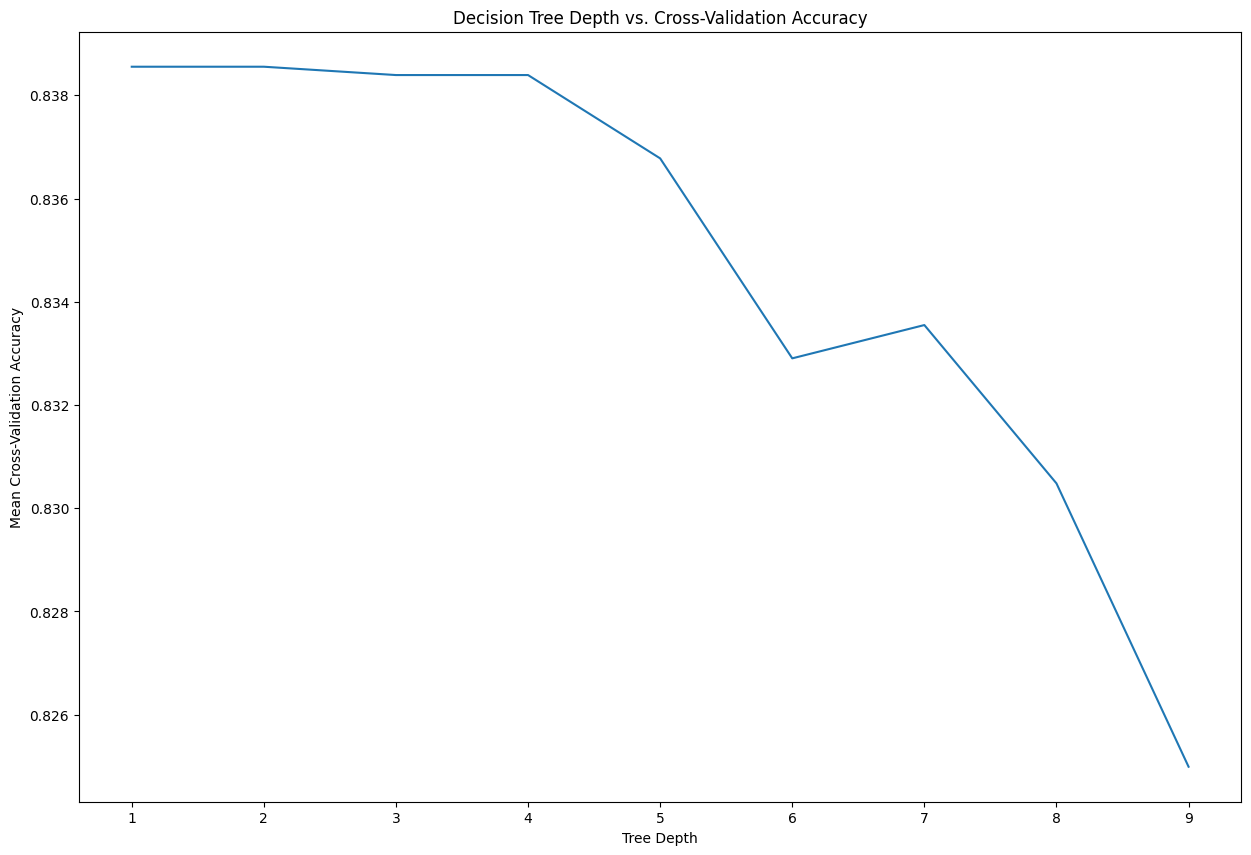

In [45]:
# Define a range of depths to evaluate
depths = range(1, 10)  # Test depths from 1 to 20
mean_scores = []

# Evaluate each depth using cross-validation
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(decision_tree, X, Y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_scores.append(scores.mean())  # Store the mean accuracy for each depth

# Plot the results
plt.figure(figsize=(15, 10))
plt.plot(depths, mean_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Decision Tree Depth vs. Cross-Validation Accuracy')
plt.show()

This code block was obtained from ChatGPT and it's used to plot the graph of the decision tree depth vs cross-validation accuracy to help figure out what the best depth for the decision tree is. This is helpful as it will give me the best and most accurate model for my data. Based off of the calculations it seems that 2 is the most effective depth for this dataset.

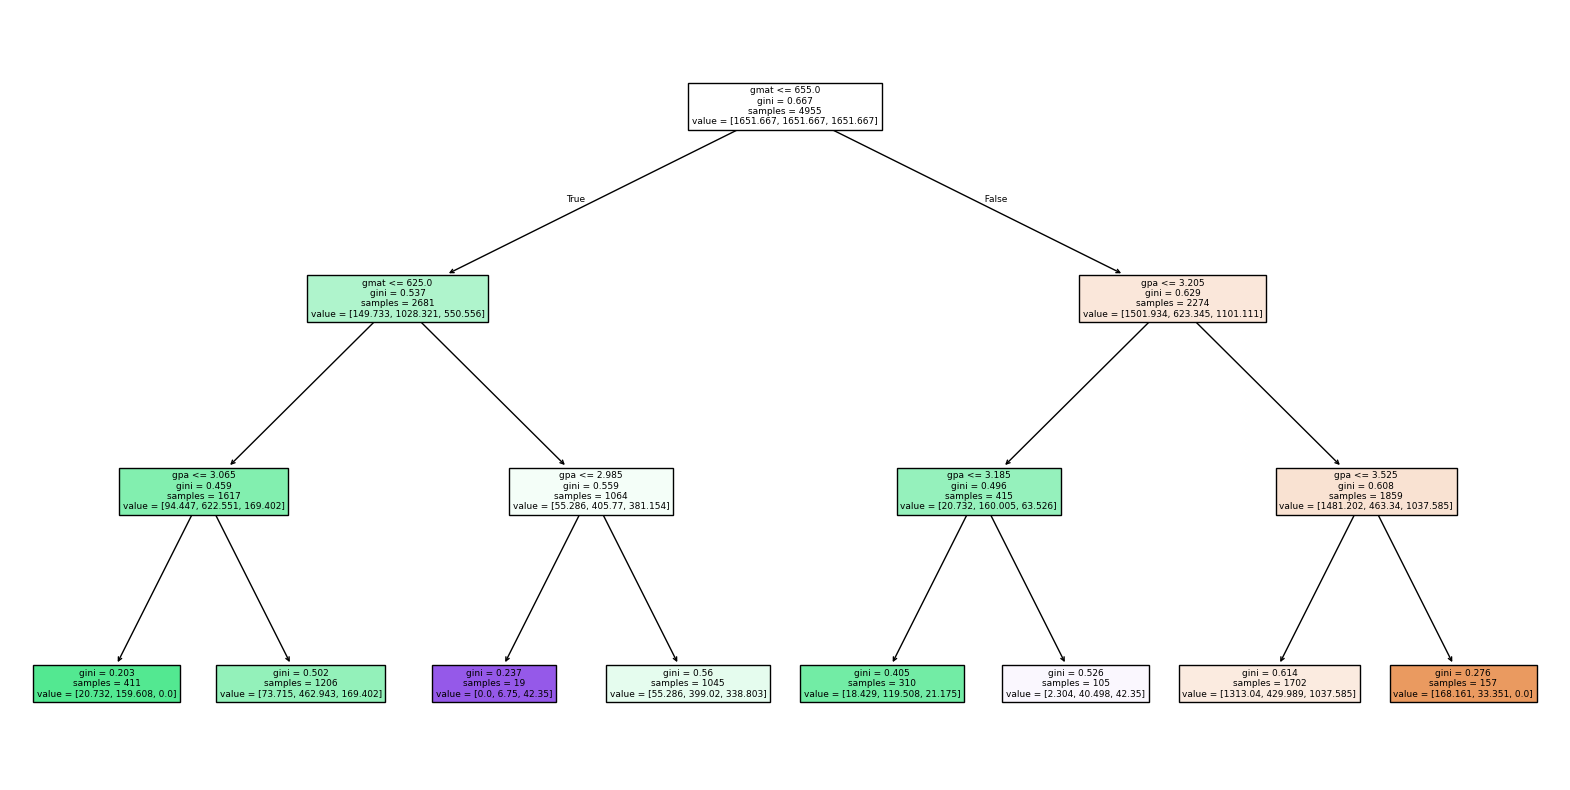

In [46]:
decision_tree = DecisionTreeClassifier(max_depth=3, class_weight="balanced") # I obtained class_weight="balanced" from ChatGPT and it's used to handle the imbalanced dataset
decision_tree = decision_tree.fit(x_train, y_train)

plt.figure(figsize=(20, 10)) # This line is used to set the size of the decision tree plot to make it more visible and readable
tree.plot_tree(decision_tree, feature_names=['gpa', 'gmat'], filled=True)
plt.show()

In this code block I am displaying the decision tree containing my data. I have had to use class_weight in this as due to this college only having a 16% acceptance rate, it leads to the model becoming very unbalanced due to having around 85% of all applications being rejected. Before I added this line, I was getting every prediction result as rejected due to the model being trained to respond with rejected responses due to their volume and not take the factors into account.

In [47]:
decision_tree.fit(x_train, y_train)

predictions = decision_tree.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
accuracy_percentage = accuracy * 100  

print('This is the accuracy of the decision tree model: ', accuracy_percentage, '%')

This is the accuracy of the decision tree model:  70.29862792574657 %


In this block, I am now using the test data which I seperated from the training data earlier to now get how accurate the model is, this works by getting all the correct results and dividing that by the wrong results 

In [ ]:
# Example new sample data
example_prediction = pd.DataFrame({'gpa': [3.5], 'gmat': [800]}) # I obtained this line from ChatGPT and it's used to create a new sample data for prediction

# Make a prediction
prediction = decision_tree.predict(example_prediction)
print("Prediction for the new sample:", prediction[0])

Prediction for the new sample: Admit
